# EXPLORATION 03
- Writier : 송영석
- Date : 2021.10.04
 

## 프로젝트: 고양이 수염 스티커 만들기

### Step 1. 스티커 구하기 or 만들기

In [125]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
print("🌫🛸")

🌫🛸


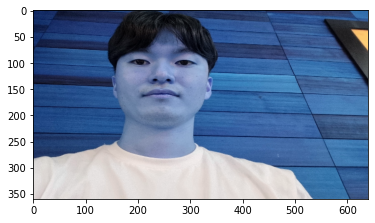

In [126]:
import os
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image.png'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (640, 360))    # 640x360의 크기로 Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
plt.imshow(img_bgr)
plt.show()


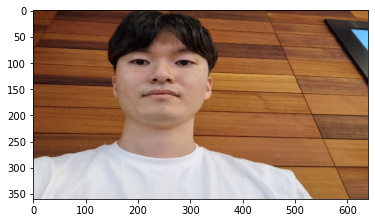

In [107]:
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

### Step 2. 얼굴 검출 & 랜드마크 검출 하기

In [108]:
import dlib
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언
print("🌫🛸")

🌫🛸


In [109]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)
print("🌫🛸")

🌫🛸


rectangles[[(167, 47) (322, 202)]]


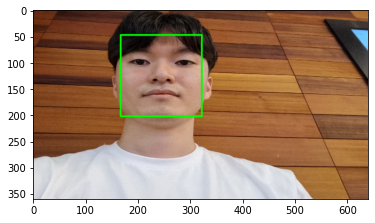

In [110]:
print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [111]:
import os
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("🌫🛸")

🌫🛸


In [112]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


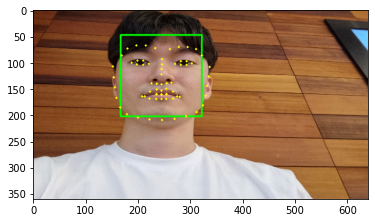

In [113]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

### Step 3. 스티커 적용 위치 확인하기

In [114]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # nose center index : 30
    x = landmark[30][0]
    y = landmark[30][1] 
    w = dlib_rect.width()
    h = dlib_rect.height()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(245, 122)
(x,y) : (245,122)
(w,h) : (156,156)


In [115]:
import os
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(156, 156, 3)


In [116]:
refined_x = x - w // 2  # left
refined_y = y - w//2       # top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (167,44)


In [117]:
#img_sticker = img_sticker[-refined_y:]
print (img_sticker.shape)

(156, 156, 3)


In [118]:

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (167,44)


### Step 4. 스티커 적용하기

In [119]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
print(sticker_area.shape)

img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

(156, 156, 3)


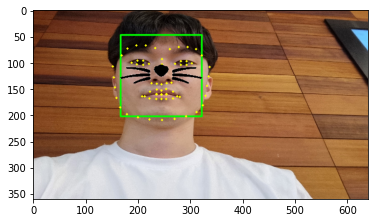

In [120]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

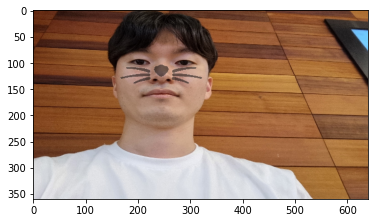

In [122]:
img_bgr_orig = img_bgr.copy()
sticker_area = img_bgr_orig[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    cv2.addWeighted(sticker_area, 0.5, np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8), 0.5, 0)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()


### Step 5. 문제점 찾아보기

1. 셀프 카메라를 다양한 각도에서 촬영하면서 스티커를 반복해서 적용해 보세요.

2. 문제점이 무엇인지 최대한 자세하게 기록해 보세요. 여러분이 생각한 문제점을 해결하기 위한 방법은 분명 존재합니다!

   (1) 얼굴 각도에 따라 스티커가 어떻게 변해야할까요?  
   (2) 멀리서 촬영하면 왜 안될까요? 옆으로 누워서 촬영하면 왜 안될까요?  
   (3) 실행 속도가 중요할까요?  
   (4) 스티커앱을 만들 때 정확도가 얼마나 중요할까요?  


#### (1) 얼굴 각도에 따라 스티커가 어떻게 변해야할까요?

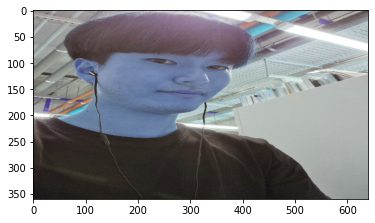

In [175]:
import os
# 옆에서 찍은 사진
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image_3.png' 
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (640, 360))    # 640x360의 크기로 Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
plt.imshow(img_bgr)
plt.show()

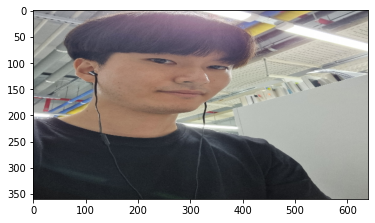

In [176]:
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [177]:
import dlib
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)
print("🌫🛸")


🌫🛸


rectangles[]


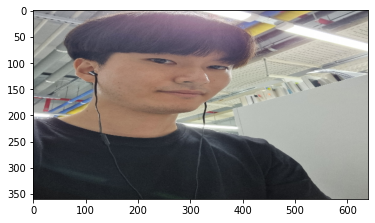

In [178]:
print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [179]:
import os
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("🌫🛸")

🌫🛸


In [180]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

IndexError: list index out of range

In [ ]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

#### 문제점  
다른 각도의 사진은 멀리 있진 않았지만 얼굴을 잘 인식하지 못 하는 문제가 있었다. 눈,코,입 모양이 표준 위치에 있어야 만 인식이 가능한 것 같았습니다.

#### (2) 멀리서 촬영하면 왜 안될까요? 옆으로 누워서 촬영하면 왜 안될까요?

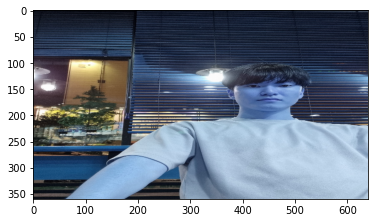

In [181]:
import os
#멀리있는 사진
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image_2.png' 
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (640, 360))    # 640x360의 크기로 Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
plt.imshow(img_bgr)
plt.show()

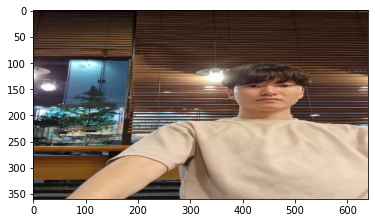

In [182]:
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [183]:
import dlib
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)
print("🌫🛸")


🌫🛸


rectangles[]


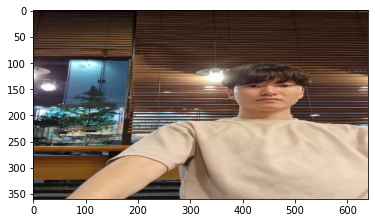

In [184]:
print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [185]:
import os
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("🌫🛸")

🌫🛸


In [186]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))


IndexError: list index out of range

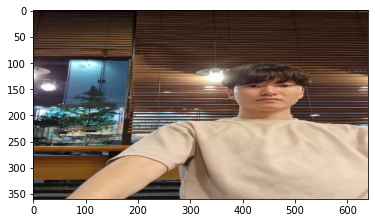

In [187]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

### 문제점 
멀리 있는 사진은 총 2장을 해보았고 그 중 더 가까운 사진을 제출용으로 사용했음에도 얼굴인식을 못 하였습니다. 얼굴의 특징을 잘 잡아내지 못하는 것 같았고 이 부분은 코드를 수정하여 해결하긴 어려워 보였습니다.

#### (3) 실행 속도가 중요할까요?  
실행속도는 중요하지 않을 것 같았습니다. 엄청나게 오랜 시간(10분 이상)이 걸리는 것도 아니고 어플로 출시되어 서비스로 이용 될때에도 매우 긴 시간이 걸리지 않는 이상 크게 시간이 중요하지는 않은 것 같습니다.

#### (4) 스티커앱을 만들 때 정확도가 얼마나 중요할까요?  
정확도는 얼굴을 인식하여 정확히 이미지를 입혀야 하기 때문에 중요할 것 같습니다. 다만 위의 경우와 같이 조금 먼 사진이나 옆 모습 사진에도 얼굴이라고 인식 할 수 있었으면 좋겠습니다. 

## 회고 
프로젝트 작성까지 해보았지만 opencv와 dlib는 처음 사용해 보아서 아직은 많이 익숙하지 않은 것 같습니다. 좀 더 앞으로 나오리라 믿고 하나하나 외우려 하지 않고 흐름대로 진행하였습니다. 다른 step들은 비슷하게 진행하였으나 step3&4는 조금 난항을 겪었습니다.  
step 3에서는 처음에는 hint로 주어진 index들을 모두 사용하여 그들간의 위치를 이용해 "볼의 위치"를 계산하려 했으나 수염이 결국 코 중심으로 들어가게 되어서 이전의 연습에서 처럼 코를 landmark로 이용해 주변을 구하였습니다. 여기서 첫째로 시간이 걸렸었지만 landmark에 대해 깊이 볼 수 있었습니다.  
step 4 에서는 np.where의 사용이 조금 헷갈려서 시간이 걸렸습니다. sticke_area의 설정하는 과정과 검은색 수염만을 나타나게 하기위해 값을 255로 수정하는 것에서 어려움을 겪었지만 찾아보며 공부할 수 있었습니다. 
아쉬운 점은 step 5의 문제점 찾기 입니다. 각도나 거리에 따라 변하는 것을 해보고 싶었으나 애초에 얼굴 인식이 조금 어려웠고 질문에 대한 답을 제대로 한것인지 제대로 된 답을 한것인지 아쉬웠습니다. opencv와 dlib에 대해서는 아예 처음 접해보아서 차차 더욱 익혀야겠다고 생각